0    99.827251
1     0.172749
Name: Class, dtype: float64


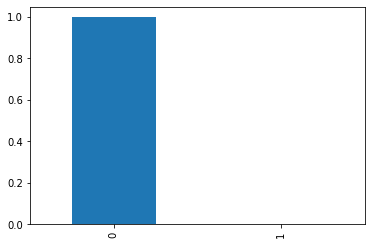

In [1]:
import pandas as pd 
df = pd.read_csv('archive/creditcard.csv')
df.Class.value_counts(normalize=True).plot(kind='bar')
print(df.Class.value_counts(normalize=True)*100)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)


#모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)


#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1,roc_score,recall))

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
modeling(lr,X_train,X_test,y_train,y_test)

정확도 : 1.00, 정밀도 : 0.73, 재현율 : 0.74
f1-score : 0.73, auc : 0.87


In [8]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
modeling(lgb,X_train,X_test,y_train,y_test)

정확도 : 1.00, 정밀도 : 0.95, 재현율 : 0.83
f1-score : 0.88, auc : 0.91


In [ ]:
# 데이터정제 후 

In [9]:
lr = LogisticRegression()
modeling(lr,X_train,X_test,y_train,y_test)

정확도 : 1.00, 정밀도 : 0.73, 재현율 : 0.74
f1-score : 0.73, auc : 0.87


In [10]:
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,
                     is_unbalance = True,boost_from_average=False)
modeling(lgb,X_train,X_test,y_train,y_test)

정확도 : 1.00, 정밀도 : 0.95, 재현율 : 0.83
f1-score : 0.89, auc : 0.92


In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (213605, 30) (213605,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (426468, 30) (426468,)
SMOTE 적용 후 레이블 값 분포: 
 0    213234
1    213234
Name: Class, dtype: int64


In [17]:
lr = LogisticRegression()
modeling(lr,X_train_over,X_test,y_train_over,y_test)

정확도 : 0.98, 정밀도 : 0.06, 재현율 : 0.90
f1-score : 0.12, auc : 0.94


c:\Users\esee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
modeling(lgb,X_train_over,X_test,y_train_over,y_test)

정확도 : 1.00, 정밀도 : 0.88, 재현율 : 0.85
f1-score : 0.87, auc : 0.93


로지스틱 회귀 모델 같은 경우는 전처리 후에 비하여 정확도,정밀도,f1-score가 급감한 반면에,

lightgbm같은 경우는 정밀도가 살짝 감소한 것을 제외하면 재현율과 AUC가 증가하는 것을 볼 수 있다.